In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Lorenz system function
def lorenz_system(x, y, z, sigma, rho, beta):
    x_dot = sigma * (y - x)
    y_dot = x * (rho - z) - y
    z_dot = x * y - beta * z
    return x_dot, y_dot, z_dot

In [ ]:
# DNA encoding function
def dna_encode(sequence):
    dna_mapping = {'00': 'A', '01': 'T', '10': 'C', '11': 'G'}
    encoded_sequence = ''
    for i in range(0, len(sequence), 2):
        encoded_sequence += dna_mapping[sequence[i:i+2]]
    return encoded_sequence

In [ ]:
# Convert grayscale image to array
def image_to_array(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)
    return img_array

In [ ]:
# Convert array to grayscale image
def array_to_image(array):
    return Image.fromarray(array, 'L')

In [ ]:
# Encrypt image using Lorenz system
def encrypt_image(image_path, sigma, rho, beta):
    # Load image
    img_array = image_to_array(image_path)
    # Initialize Lorenz system parameters
    x, y, z = 0.1, 0.1, 0.1
    # Encrypt image using Lorenz system
    encrypted_image = np.zeros_like(img_array)
    chaotic_sequence_array = np.zeros_like(img_array, dtype=np.uint8)  # Array to store chaotic sequence
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            x_dot, y_dot, z_dot = lorenz_system(x, y, z, sigma, rho, beta)
            x += 0.01 * x_dot
            y += 0.01 * y_dot
            z += 0.01 * z_dot
            chaotic_sequence_array[i, j] = np.clip(int((x + y + z) * 255), 0, 255).astype(np.uint8)  # Store chaotic sequence
            encrypted_image[i, j] = img_array[i, j] ^ chaotic_sequence_array[i, j]  # XOR encryption

    return encrypted_image, chaotic_sequence_array

In [ ]:
# Decrypt image using DNA decoding and Lorenz system
def decrypt_image(encrypted_dna_sequence, sigma, rho, beta, shape):
    # Convert DNA sequence to chaotic sequence
    chaotic_sequence = ''
    for nucleotide in encrypted_dna_sequence:
        for key, value in {'A': '00', 'T': '01', 'C': '10', 'G': '11'}.items():
            if nucleotide == key:
                chaotic_sequence += value

    # Convert chaotic sequence to array
    chaotic_array = np.packbits(np.array([int(bit) for bit in chaotic_sequence]))
    chaotic_array = chaotic_array[:shape[0]*shape[1]].reshape(shape)

    # Initialize Lorenz system parameters
    x, y, z = 0.1, 0.1, 0.1

    # Decrypt image using Lorenz system
    decrypted_image = np.zeros(shape, dtype=np.uint8)
    for i in range(shape[0]):
        for j in range(shape[1]):
            x_dot, y_dot, z_dot = lorenz_system(x, y, z, sigma, rho, beta)
            x += 0.01 * x_dot
            y += 0.01 * y_dot
            z += 0.01 * z_dot
            decrypted_image[i, j] = chaotic_array[i, j] ^ np.clip(int((x + y + z) * 255), 0, 255).astype(np.uint8)  # XOR decryption

    return decrypted_image


(-0.5, 178.5, 167.5, -0.5)

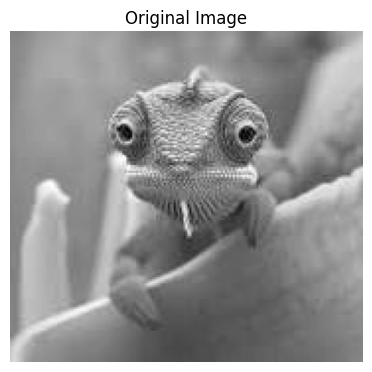

In [ ]:
# Example usage
image_path = '/content/example_file.jpeg'
sigma, rho, beta = 10, 28, 8/3  # Lorenz system parameters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(array_to_image(image_to_array(image_path)), cmap='gray')
plt.title('Original Image')
plt.axis('off')


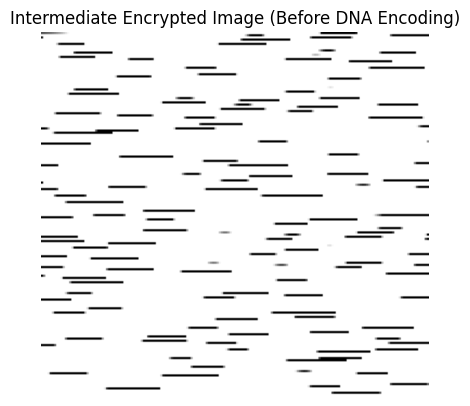

In [ ]:
# Encrypt image
encrypted_image, chaotic_sequence_array = encrypt_image(image_path, sigma, rho, beta)
# Visualize intermediate encrypted image (chaotic sequence) before DNA encoding
plt.figure(figsize=(5, 5))
plt.imshow(chaotic_sequence_array, cmap='gray')
plt.title('Intermediate Encrypted Image (Before DNA Encoding)')
plt.axis('off')
plt.show()

In [ ]:
# Convert chaotic sequence to DNA sequence
chaotic_sequence = ''.join([str(bit) for bit in np.unpackbits(encrypted_image)])
encrypted_dna_sequence = dna_encode(chaotic_sequence)
print(encrypted_dna_sequence)



ACCGACAAATCAATAAAACTAATCGGTTGCCCACTCAGTCTACTTTCCTGGGTGTTTGAGTGACTGAATGAATCGGTCGGTCGCTCGTTCGTTCGATCCCTCCTTCCTTCCATCTGTCTCTCTCTCTTTCTTTCTCTCTCTCTGTCCATCCTTCCTTCCTTCGATCGATCGTTCGCTCGCTCGCTCGTTCGTTCGTTCGATCCGTCCCTCCCTCCCTCCGTCCGTCGCTCGGTGACTGTTTGCATGCGTGGTTGGCCAATCAACCATACATCCACACACTCACTCACTCACACACACATGCATGCATCCATTCATTCATACATCCATCCATGCATCCATTCAACCAAATGGCTGCGTGCCTGCATGTCTGTTTGTTTGTCTGTGTGTGTGCTTGGATGGCCAAACAAATGGGTGGGTGCGTGCCTGCATGTCTGTTTGTATGTATGTATGAGTGTGTGGACAAACAAGCATGCAGACTAACTTCCTTGCTCTCTCTCTCACTTTCTACCTAACCTTTGACTGGGCAAGCATTCATTCAAGCAATCAATCAATCAATCAAATGGCTGGATGCCTGCTTGACTCCTCTACCTTACTTCCTCTCTGCCCATCCTACCTTCCTCCCTCCCTACCATCTGTCTCGCTTACAGTCATCCATATGGGTGCATGAGTGAGTGAATCGTTCCTTCTGTCTCTCTTTCAGTCATTTGGTTGATTCACATCCATCCATCCATCCATTCATACAACCAATTGGCTGGTTGGATGCTTGTGTGTTTGAGTGACTGAATGAATCGGTCGCTCGCTCGTTCGATCGATCCTTCCTTCCATCCATCTGTCTCTCTCTCTTTCTTTCTCTCTCTCTGTCCATCCTTCCTTCCTTCCGTCGATCGTTCGCTCGCTCGTTCGTTCGATCGATCCGTCCCTCCCTCCCTCCCTCCGTCCGTCGCTCGGTGACTGTATGTGTGCCTGGATGGCCAATCAACCATACATCCATGCACACACA

In [ ]:
'''# Convert DNA sequence to chaotic sequence after encoding
encoded_chaotic_sequence_array = np.packbits(np.array([int(bit) for bit in ''.join(['{:08b}'.format(ord(c)) for c in encrypted_dna_sequence])]))
encoded_chaotic_sequence_array = encoded_chaotic_sequence_array[:chaotic_sequence_array.shape[0]*chaotic_sequence_array.shape[1]].reshape(chaotic_sequence_array.shape)

# Visualize intermediate encrypted image (chaotic sequence) after DNA encoding
plt.figure(figsize=(5, 5))
plt.imshow(encoded_chaotic_sequence_array, cmap='gray')
plt.title('Intermediate Encrypted Image (After DNA Encoding)')
plt.axis('off')
plt.show()'''

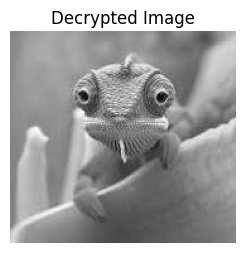

In [ ]:
# Decrypt image
decrypted_image = decrypt_image(encrypted_dna_sequence, sigma, rho, beta, image_to_array(image_path).shape)
# Visualize results
plt.subplot(1, 2, 2)
plt.imshow(array_to_image(decrypted_image), cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')
plt.show()